In [34]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *

In [35]:
1+1

2

In [36]:
XCr_path

'/global/cscratch1/sd/krzywins/CRYSTALBPMExpl/crystal-fft-bpm/examples/../'

In [37]:

def single_realization_with_data(delta_theta):
 
    xcr = XCrystal(XCr_path+'/config/C400_TD_9p8keV_ThermalBump1.yaml')
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [38]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(15e-6)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Delta theta:  1.5e-05 ; Reflectivity:  0.6810920407600669 ; Transmission:  0.2633112462533358 PhaseRefl -0.9496037018158533


In [39]:
xcr = XCrystal(XCr_path+'/config/C400_TD_9p8keV_ThermalBump1.yaml')


In [40]:
U1_xyz.shape

(1, 4267, 1, 185)

In [41]:
kmax=U1_xyz.shape[3]
kmax

185

In [42]:
logh1=((xcr.Xx-xcr.sep1) >= (-xcr.HH )) * ((xcr.Xx-xcr.sep1) <=(xcr.HH ))
logh2=((xcr.Xx-xcr.sep1) >= (-xcr.HH*0.95 )) * ((xcr.Xx-xcr.sep1) <=(xcr.HH*0.95 ))
logh1h2=logh1^logh2
logh1h2.shape
xcr.Xx.shape


(4267, 1)

In [43]:
log_hJ=np.zeros((xcr.xgrid,kmax))      
for i in range(xcr.xgrid):
    for k in range(kmax):
        log_hJ[i,k]=logh1h2[i]

(3600.0, 400.0)

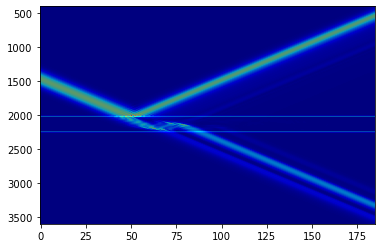

In [44]:
plt.imshow(np.abs(U1_xyz[0,:,0,:]**1 + U2_xyz[0,:,0,:]**1), aspect='auto',cmap='jet')
plt.imshow(log_hJ, aspect='auto',cmap='jet', alpha=0.4)
plt.ylim(3600,400)